In [1]:
import pandas as pd
%matplotlib inline

In [2]:
df = pd.read_csv('../Data_with_NumMosquitos/aggregated_train_with_nummosquitos.csv')

In [3]:
df.head()

,Unnamed: 0,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,...,19_week_avrgPrecipTotal,19_week_avrgTavg,20_week_avrgPrecipTotal,20_week_avrgTavg,21_week_avrgPrecipTotal,21_week_avrgTavg,22_week_avrgPrecipTotal,22_week_avrgTavg,23_week_avrgPrecipTotal,23_week_avrgTavg
0,0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,...,0.062586,63.275862,0.062586,63.275862,0.062586,63.275862,0.062586,63.275862,0.062586,63.275862
1,1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,...,0.062586,63.275862,0.062586,63.275862,0.062586,63.275862,0.062586,63.275862,0.062586,63.275862
2,2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,...,0.062586,63.275862,0.062586,63.275862,0.062586,63.275862,0.062586,63.275862,0.062586,63.275862
3,3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,...,0.062586,63.275862,0.062586,63.275862,0.062586,63.275862,0.062586,63.275862,0.062586,63.275862
4,4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,...,0.062586,63.275862,0.062586,63.275862,0.062586,63.275862,0.062586,63.275862,0.062586,63.275862


In [4]:
df.columns

Index(['Unnamed: 0', 'Date', 'Address', 'Species', 'Block', 'Street', 'Trap',
       'AddressNumberAndStreet', 'Latitude', 'Longitude', 'AddressAccuracy',
       'NumMosquitos', 'WnvPresent', 'Station', 'Tmax', 'Tmin', 'Tavg',
       'Depart', 'DewPoint', 'WetBulb', 'Heat', 'Cool', 'Sunrise', 'Sunset',
       'CodeSum', 'Depth', 'SnowFall', 'PrecipTotal', 'StnPressure',
       'SeaLevel', 'ResultSpeed', 'ResultDir', 'AvgSpeed', 'Year', 'Month',
       'Tavg_week', 'precip_week', 'heat_dw', 'cool_dw',
       '1_week_avrgPrecipTotal', '1_week_avrgTavg', '2_week_avrgPrecipTotal',
       '2_week_avrgTavg', '3_week_avrgPrecipTotal', '3_week_avrgTavg',
       '4_week_avrgPrecipTotal', '4_week_avrgTavg', '5_week_avrgPrecipTotal',
       '5_week_avrgTavg', '6_week_avrgPrecipTotal', '6_week_avrgTavg',
       '7_week_avrgPrecipTotal', '7_week_avrgTavg', '8_week_avrgPrecipTotal',
       '8_week_avrgTavg', '9_week_avrgPrecipTotal', '9_week_avrgTavg',
       '10_week_avrgPrecipTotal', '10_week_avrg

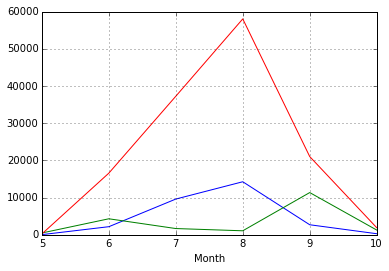

In [5]:
#df.groupby(['month']).sum()['Heat_x'].plot()
#df.groupby(['month']).sum()['Heat_y'].plot()
df.groupby(['Month']).sum()['heat_dw'].plot()
df.groupby(['Month']).sum()['cool_dw'].plot()
df.groupby(['Month']).sum()['NumMosquitos'].plot()
#df.groupby(['Month']).sum()['WnvPresent'].plot()
#df.groupby(['Month']).sum()['PrecipTotal'].plot()


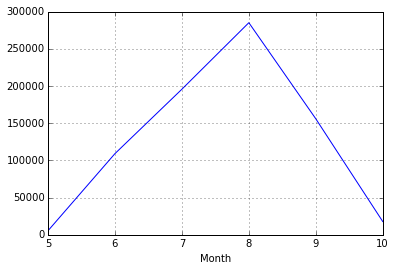

In [6]:
df.groupby(['Month']).sum()['Tavg'].plot()


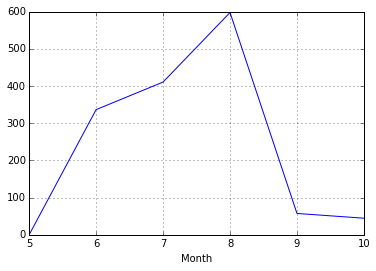

In [7]:
df.groupby(['Month']).sum()['PrecipTotal'].plot()

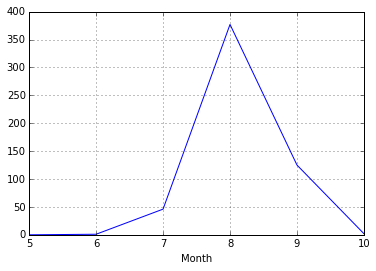

In [8]:
df.groupby(['Month']).sum()['WnvPresent'].plot()

# use exponentially weighted moving average?


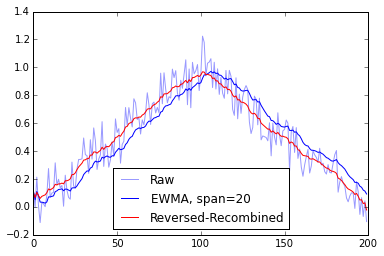

In [9]:
import matplotlib.pyplot as plt
import pandas, numpy as np
%matplotlib inline
ewma = pandas.stats.moments.ewma

# make a hat function, and add noise
x = np.linspace(0,1,100)
x = np.hstack((x,x[::-1]))
x += np.random.normal( loc=0, scale=0.1, size=200 )
plt.plot( x, alpha=0.4, label='Raw' )

# take EWMA in both directions with a smaller span term
fwd = ewma( x, span=15 )          # take EWMA in fwd direction
bwd = ewma( x[::-1], span=15 )    # take EWMA in bwd direction
c = np.vstack(( fwd, bwd[::-1] )) # lump fwd and bwd together
c = np.mean( c, axis=0 )          # average  

# regular EWMA, with bias against trend
plt.plot( ewma( x, span=20 ), 'b', label='EWMA, span=20' )

# "corrected" (?) EWMA
plt.plot( c, 'r', label='Reversed-Recombined' )

plt.legend(loc=8)
plt.savefig( 'ewma_correction.png', fmt='png', dpi=100 )

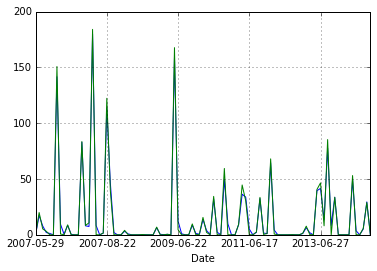

In [10]:
df['exp_mov_PrecipTotal'] = ewma(df.PrecipTotal,span=21)
df.groupby(['Date']).sum()['exp_mov_PrecipTotal'].plot()
df.groupby(['Date']).sum()['PrecipTotal'].plot()

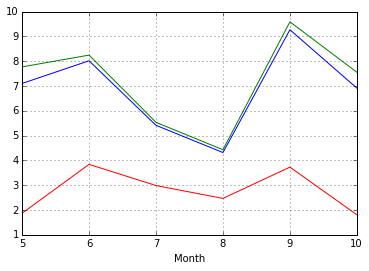

In [11]:
df['exp_mov_Tavg'] = ewma(df.Tavg,span=21)
df.groupby(['Month']).std()['exp_mov_Tavg'].plot()
df.groupby(['Month']).std()['Tavg'].plot()
df.groupby(['Month']).std()['3_week_avrgTavg'].plot()


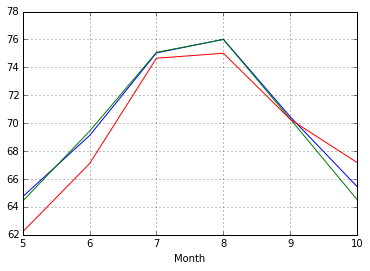

In [12]:
df['exp_mov_Tavg'] = ewma(df.Tavg,span=21)
df.groupby(['Month']).mean()['exp_mov_Tavg'].plot()
df.groupby(['Month']).mean()['Tavg'].plot()
df.groupby(['Month']).mean()['3_week_avrgTavg'].plot()

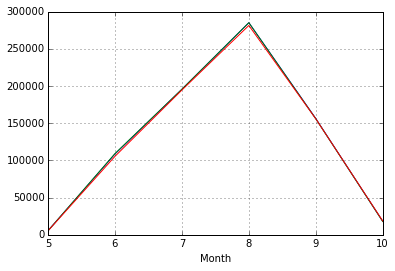

In [13]:
df['exp_mov_Tavg'] = ewma(df.Tavg,span=21)
df.groupby(['Month']).sum()['exp_mov_Tavg'].plot()
df.groupby(['Month']).sum()['Tavg'].plot()
df.groupby(['Month']).sum()['3_week_avrgTavg'].plot()

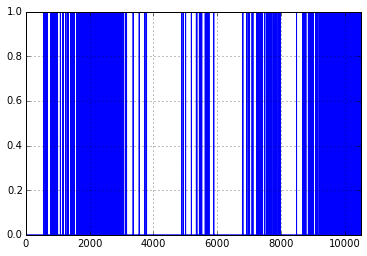

In [18]:
df['WnvPresent'].plot()

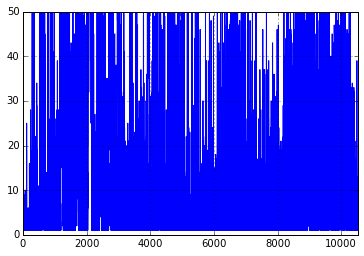

In [19]:
df['NumMosquitos'].plot()

Date
2007-05-29    Axes(0.125,0.125;0.775x0.775)
2007-06-05    Axes(0.125,0.125;0.775x0.775)
2007-06-26    Axes(0.125,0.125;0.775x0.775)
2007-06-29    Axes(0.125,0.125;0.775x0.775)
2007-07-02    Axes(0.125,0.125;0.775x0.775)
2007-07-11    Axes(0.125,0.125;0.775x0.775)
2007-07-18    Axes(0.125,0.125;0.775x0.775)
2007-07-19    Axes(0.125,0.125;0.775x0.775)
2007-07-25    Axes(0.125,0.125;0.775x0.775)
2007-07-27    Axes(0.125,0.125;0.775x0.775)
2007-08-01    Axes(0.125,0.125;0.775x0.775)
2007-08-02    Axes(0.125,0.125;0.775x0.775)
2007-08-03    Axes(0.125,0.125;0.775x0.775)
2007-08-07    Axes(0.125,0.125;0.775x0.775)
2007-08-08    Axes(0.125,0.125;0.775x0.775)
2007-08-09    Axes(0.125,0.125;0.775x0.775)
2007-08-15    Axes(0.125,0.125;0.775x0.775)
2007-08-16    Axes(0.125,0.125;0.775x0.775)
2007-08-17    Axes(0.125,0.125;0.775x0.775)
2007-08-21    Axes(0.125,0.125;0.775x0.775)
2007-08-22    Axes(0.125,0.125;0.775x0.775)
2007-08-24    Axes(0.125,0.125;0.775x0.775)
2007-08-28    Axes(0.125,0.

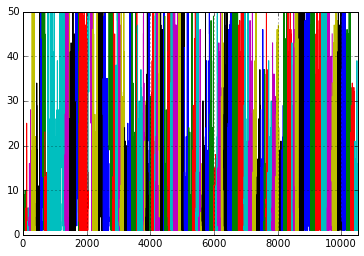

In [20]:
df.groupby('Date')['NumMosquitos'].plot()

In [24]:
len(df.groupby('Date')['Trap'].unique())

95

In [25]:
df.groupby('Date')['Trap'].unique()

Date
2007-05-29    [T002, T007, T015, T143, T148, T045, T046, T04...
2007-06-05    [T002, T015, T143, T009, T011, T016, T025, T02...
2007-06-26    [T002, T007, T015, T143, T148, T011, T016, T02...
2007-06-29    [T002, T015, T143, T148, T016, T028, T141, T14...
2007-07-02    [T002, T007, T015, T148, T009, T011, T016, T02...
2007-07-11    [T002, T007, T015, T143, T148, T009, T011, T01...
2007-07-18    [T002, T007, T015, T143, T148, T011, T016, T02...
2007-07-19    [T091, T145, T047, T035, T061, T062, T065, T06...
2007-07-25                             [T115, T138, T107, T128]
2007-07-27    [T002, T007, T015, T143, T148, T009, T011, T01...
2007-08-01    [T002, T007, T015, T143, T148, T009, T011, T01...
2007-08-02    [T086, T091, T096, T089, T090, T092, T135, T15...
2007-08-03                                               [T215]
2007-08-07    [T002, T007, T015, T143, T148, T009, T011, T01...
2007-08-08                       [T115, T138, T107, T128, T103]
2007-08-09           [T013, T138, T

In [22]:
len(df)

10506

In [23]:
len(df['Date'].unique())

95

build model for each location?

OR: build models for different clusters of traplocations!

In [32]:
df.groupby(['WnvPresent','Trap']).count()

Unnamed: 0  Date  Address  Species  Block  Street  \
WnvPresent Trap                                                      
0          T001          15    15       15       15     15      15   
           T002         167   167      167      167    167     167   
           T003         108   108      108      108    108     108   
           T004          12    12       12       12     12      12   
           T005          12    12       12       12     12      12   
           T006          20    20       20       20     20      20   
           T007          23    23       23       23     23      23   
           T008         129   129      129      129    129     129   
           T009         102   102      102      102    102     102   
           T011         122   122      122      122    122     122   
           T012         101   101      101      101    101     101   
           T013          94    94       94       94     94      94   
           T014          26    26       26       26     26      26   
           T015          31    31       31       31     31      31   
           T016          59    59       59       59     59      59   
           T017          78    78       78       78     78      78   
           T018          63    63       63       63     63      63   
           T019          23    23       23       23     23      23   
           T025          27    27       27       27     27      27   
           T027          86    86       86       86     86      86   
           T028         108   108      108      108    108     108   
           T030         118   118      118      118    118     118   
           T031         141   141      141      141    141     141   
           T033          92    92       92       92     92      92   
           T034          17    17       17       17     17      17   
           T035          69    69       69       69     69      69   
           T036          23    23       23       23     23      23   
           T037          28    28       28       28     28      28   
           T039          76    76       76       76     76      76   
           T040           2     2        2        2      2       2   
...                     ...   ...      ...      ...    ...     ...   
1          T152           2     2        2        2      2       2   
           T154           2     2        2        2      2       2   
           T155           6     6        6        6      6       6   
           T156           1     1        1        1      1       1   
           T158           6     6        6        6      6       6   
           T159           4     4        4        4      4       4   
           T160           4     4        4        4      4       4   
           T162           1     1        1        1      1       1   
           T200           1     1        1        1      1       1   
           T209           3     3        3        3      3       3   
           T212           3     3        3        3      3       3   
           T215           3     3        3        3      3       3   
           T218           2     2        2        2      2       2   
           T220           4     4        4        4      4       4   
           T221           9     9        9        9      9       9   
           T222           1     1        1        1      1       1   
           T223           9     9        9        9      9       9   
           T224           1     1        1        1      1       1   
           T225          11    11       11       11     11      11   
           T226           4     4        4        4      4       4   
           T227           4     4        4        4      4       4   
           T228           6     6        6        6      6       6   
           T230           7     7        7        7      7       7   
           T231           4     4        4        4      4       4   
           T232           2

In [29]:
len(df.Trap.unique())

136

In [35]:
len(df[df['WnvPresent'] == 1])/

551

In [50]:
df.groupby(['Species'])['WnvPresent'].sum()/df.groupby(['Species'])['WnvPresent'].count()

Species
CULEX ERRATICUS           0.000000
CULEX PIPIENS             0.088922
CULEX PIPIENS/RESTUANS    0.055135
CULEX RESTUANS            0.017883
CULEX SALINARIUS          0.000000
CULEX TARSALIS            0.000000
CULEX TERRITANS           0.000000
Name: WnvPresent, dtype: float64

In [48]:
df.groupby('Species').count()

,Unnamed: 0,Date,Address,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,...,20_week_avrgPrecipTotal,20_week_avrgTavg,21_week_avrgPrecipTotal,21_week_avrgTavg,22_week_avrgPrecipTotal,22_week_avrgTavg,23_week_avrgPrecipTotal,23_week_avrgTavg,exp_mov_PrecipTotal,exp_mov_Tavg
Species,,,,,,,,,,,,,,,,,,,,,
CULEX ERRATICUS,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
CULEX PIPIENS,2699,2699,2699,2699,2699,2699,2699,2699,2699,2699,...,2699,2699,2699,2699,2699,2699,2699,2699,2699,2699
CULEX PIPIENS/RESTUANS,4752,4752,4752,4752,4752,4752,4752,4752,4752,4752,...,4752,4752,4752,4752,4752,4752,4752,4752,4752,4752
CULEX RESTUANS,2740,2740,2740,2740,2740,2740,2740,2740,2740,2740,...,2740,2740,2740,2740,2740,2740,2740,2740,2740,2740
CULEX SALINARIUS,86,86,86,86,86,86,86,86,86,86,...,86,86,86,86,86,86,86,86,86,86
CULEX TARSALIS,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
CULEX TERRITANS,222,222,222,222,222,222,222,222,222,222,...,222,222,222,222,222,222,222,222,222,222
